In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2021-12-14 02:45:10.543161: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-14 02:45:10.543190: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
train_dir = '../data/train'
valid_dir = '../data/validation'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(100, 100, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.7))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(100, 100),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 824 images belonging to 2 classes.


In [6]:
val_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = val_datagen.flow_from_directory(valid_dir,
                                                        target_size=(100, 100),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 274 images belonging to 2 classes.


In [7]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
42/42 [==============================] - 6s 126ms/step - loss: 0.7039 - acc: 0.4915 - val_loss: 0.6501 - val_acc: 0.6861
Epoch 2/10
42/42 [==============================] - 5s 122ms/step - loss: 0.5810 - acc: 0.7136 - val_loss: 0.5387 - val_acc: 0.7956
Epoch 3/10
42/42 [==============================] - 5s 121ms/step - loss: 0.4814 - acc: 0.8301 - val_loss: 0.4754 - val_acc: 0.8723
Epoch 4/10
42/42 [==============================] - 5s 123ms/step - loss: 0.4255 - acc: 0.8956 - val_loss: 0.4376 - val_acc: 0.9124
Epoch 5/10
42/42 [==============================] - 5s 121ms/step - loss: 0.3963 - acc: 0.9211 - val_loss: 0.4083 - val_acc: 0.9453
Epoch 6/10
42/42 [==============================] - 5s 123ms/step - loss: 0.3791 - acc: 0.9260 - val_loss: 0.3865 - val_acc: 0.9526
Epoch 7/10
42/42 [==============================] - 5s 122ms/step - loss: 0.3603 - acc: 0.9393 - val_loss: 0.3602 - val_acc: 0.9562
Epoch 8/10
42/42 [==============================] - 5s 124ms/step - loss: 0.

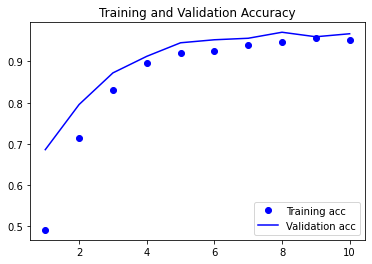

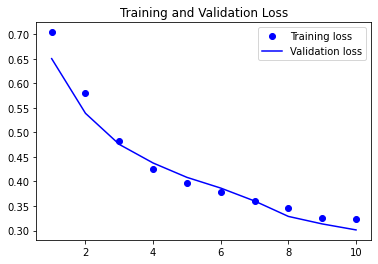

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()